In [63]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import json
from MCForecastTools import MCSimulation
import os
import requests
import alpaca_trade_api as tradeapi
import seaborn as sns

from dotenv import load_dotenv



%matplotlib inline

In [2]:
# Reading Jim Cramer 1 week Covid returns
file_path=Path("../pandemic_stock_picks.pkl")

cramer_index = pd.read_pickle(file_path)
cramer_index=cramer_index.sort_index()
cramer_index



AAPL                                           \
                             open      high       low     close     volume   
time                                                                         
2019-03-06 00:00:00-05:00  174.67  175.4900  173.9400  174.5100   17535168   
2019-03-07 00:00:00-05:00  174.02  174.4400  172.0200  172.4700   20110131   
2019-03-08 00:00:00-05:00  170.32  173.0700  169.5000  172.9200   19475688   
2019-03-11 00:00:00-04:00  175.49  179.1200  175.3500  178.9800   26225966   
2019-03-12 00:00:00-04:00  180.00  182.6700  179.3700  180.9400   27277399   
2019-03-13 00:00:00-04:00  182.25  183.3000  180.9200  181.7200   23960992   
2019-03-14 00:00:00-04:00  183.90  184.1000  182.5600  183.7300   19457731   
2019-03-15 00:00:00-04:00  184.66  187.3300  184.6600  186.2100   21750706   
2019-03-18 00:00:00-04:00  185.80  188.3900  185.7900  188.0300   22563772   
2019-03-19 00:00:00-04:00  188.35  188.9900  185.9200  186.5400   26863005   
2019-03-20 00:00:00-04:00  186.23  189.4900  184.7300  188.1700   26974003   
2019-03-21 00:00:00-04:00  190.02  196.3300  189.8100  195.0500   42720798   
2019-03-22 00:00:00-04:00  195.34  197.6900  190.7800  191.0600   38334323   
2019-03-25 00:00:00-04:00  191.55  191.9800  186.6000  188.7700   40742481   
2019-03-26 00:00:00-04:00  191.64  192.8800  184.5800  186.7900   43454017   
2019-03-27 00:00:00-04:00  188.75  189.7600  186.5500  188.4700   26586290   
2019-03-28 00:00:00-04:00  188.95  189.5590  187.5300  188.7100   19309376   
2019-03-29 00:00:00-04:00  189.99  190.0800  188.5400  189.9400   18489986   
2019-04-01 00:00:00-04:00  191.64  191.6800  188.3800  191.2400   12098014   
2019-04-02 00:00:00-04:00  191.09  194.4600  191.0500  194.0400   19797454   
2019-04-03 00:00:00-04:00  193.25  196.5000  193.1500  195.3500   19793141   
2019-04-04 00:00:00-04:00  194.79  196.3700  193.1400  195.7200   17091108   
2019-04-05 00:00:00-04:00  196.45  197.1000  195.9300  196.9700   15842943   
2019-04-08 00:00:00-04:00  196.42  200.2300  196.3400  200.0800   23231403   
2019-04-09 00:00:00-04:00  200.32  202.8500  199.2300  199.5000   32840959   
2019-04-10 00:00:00-04:00  198.68  200.7400  198.1800  200.6600   19861942   
2019-04-11 00:00:00-04:00  200.85  201.0000  198.4431  198.9500   17931789   
2019-04-12 00:00:00-04:00  199.20  200.1400  196.2100  198.8800   24667735   
2019-04-15 00:00:00-04:00  198.58  199.8500  198.0100  199.2300   14551176   
2019-04-16 00:00:00-04:00  199.46  201.3700  198.5600  199.2500   24002891   
...                           ...       ...       ...       ...        ...   
2021-01-22 00:00:00-05:00  136.28  139.8500  135.0200  138.9699  104455613   
2021-01-25 00:00:00-05:00  143.07  145.0900  136.5400  142.9000  142335837   
2021-01-26 00:00:00-05:00  143.60  144.3000  141.3700  143.1850   85816874   
2021-01-27 00:00:00-05:00  143.43  144.3000  140.4100  142.5300  110342303   
2021-01-28 00:00:00-05:00  139.52  141.9900  136.7000  137.0400  127192871   
2021-01-29 00:00:00-05:00  135.83  136.7400  130.2100  131.8300  162479747   
2021-02-01 00:00:00-05:00  133.75  135.3800  130.9300  134.1000   96660055   
2021-02-02 00:00:00-05:00  135.73  136.3100  134.6100  134.9800   73079171   
2021-02-03 00:00:00-05:00  135.76  135.7700  133.6100  133.9000   76952077   
2021-02-04 00:00:00-05:00  136.30  137.4000  134.5900  137.4000   71745898   
2021-02-05 00:00:00-05:00  137.35  137.4200  135.8600  136.7700   69111348   
2021-02-08 00:00:00-05:00  136.03  136.9600  134.9200  136.9007   63184550   
2021-02-09 00:00:00-05:00  136.62  137.8770  135.8500  136.0000   70140432   
2021-02-10 00:00:00-05:00  136.48  136.9900  134.4000  135.3600   66856066   
2021-02-11 00:00:00-05:00  135.90  136.3900  133.7700  135.1200   59377028   
2021-02-12 00:00:00-05:00  134.35  135.5300  133.6921  135.3800   54861442   
2021-02-16 00:00:00-05:00  135.49  136.0100  132.7900  133.1600   72596290   
2021-02-17 00:00:00-05:00  131.25  132.2200  129.47

In [3]:
cramer_index = cramer_index.astype("float")
cramer_index.dtypes

AAPL  open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
AMD   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
AMZN  open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
ATVI  open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
COST  open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
CPB   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
                 ...   
PEP   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
PLD   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
SHOP  open      

In [4]:
#Baseline Dataframe for 2020 data
baseline_df= cramer_index.iloc[253:258]

#Create Dataframe to hold closing prices data
closing_df = pd.DataFrame()

#Add only closing prices from ticker data Dataframe
closing_df["FB"] = baseline_df["FB"]["close"]
closing_df["AMZN"] = baseline_df["AMZN"]["close"]
closing_df["AAPL"] = baseline_df["AAPL"]["close"]
closing_df["NFLX"] = baseline_df["NFLX"]["close"]
closing_df["GOOG"] = baseline_df["GOOG"]["close"]
closing_df["SHOP"] = baseline_df["SHOP"]["close"]
closing_df["PLD"] = baseline_df["PLD"]["close"]
closing_df["TTWO"] = baseline_df["TTWO"]["close"]
closing_df["ATVI"] = baseline_df["ATVI"]["close"]
closing_df["NVDA"] = baseline_df["NVDA"]["close"]
closing_df["AMD"] = baseline_df["AMD"]["close"]
closing_df["PEP"] = baseline_df["PEP"]["close"]
closing_df["MKC"] = baseline_df["MKC"]["close"]
closing_df["DPZ"] = baseline_df["DPZ"]["close"]
closing_df["WING"] = baseline_df["WING"]["close"]
closing_df["COST"] = baseline_df["COST"]["close"]
closing_df["ETSY"] = baseline_df["ETSY"]["close"]
closing_df["CPB"] = baseline_df["CPB"]["close"]
closing_df["OKTA"] = baseline_df["OKTA"]["close"]
closing_df["ZM"] = baseline_df["ZM"]["close"]

closing_df

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
time,,,,,,,,,,,,,,,,,,,,
2020-03-06 00:00:00-05:00,181.11,1901.14,288.98,368.90,1298.41,472.0877,85.83,117.71,59.960,266.070,48.600,137.27,150.54,336.47,79.28,311.340,60.61,51.750,125.99,114.3300
2020-03-09 00:00:00-04:00,168.60,1800.01,266.09,346.03,1214.51,417.6100,77.76,113.83,57.165,245.010,43.260,130.15,143.87,336.26,74.76,300.945,58.50,50.190,114.86,113.7500
2020-03-10 00:00:00-04:00,178.19,1894.00,285.69,364.27,1281.01,450.1700,80.86,118.75,60.720,261.080,45.380,134.23,151.49,344.05,76.17,309.670,57.97,51.250,119.21,108.4858
2020-03-11 00:00:00-04:00,170.22,1819.63,275.30,349.59,1215.10,422.2300,73.72,118.90,59.330,246.160,45.690,129.66,146.61,332.66,71.57,297.270,50.21,50.475,114.77,110.2600
2020-03-12 00:00:00-04:00,154.46,1676.21,248.00,312.63,1113.84,377.5200,70.17,108.35,54.560,216.035,39.005,115.34,131.17,315.61,68.26,279.635,44.04,47.660,106.08,109.4700


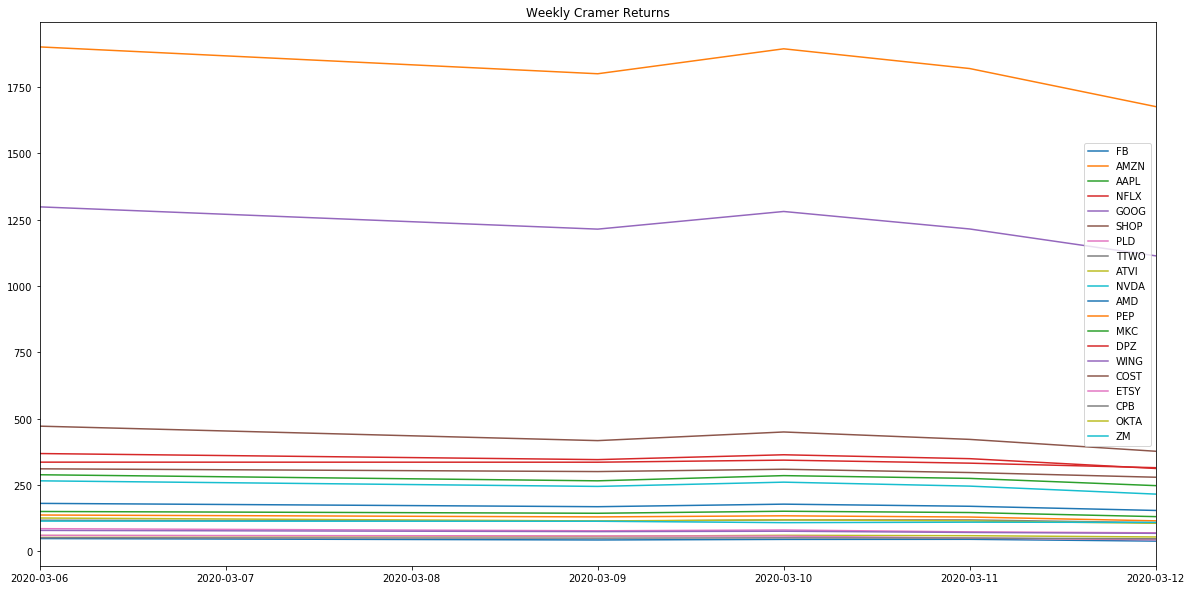

In [6]:
closing_df.plot(figsize=(20,10), title="Weekly Cramer Returns")

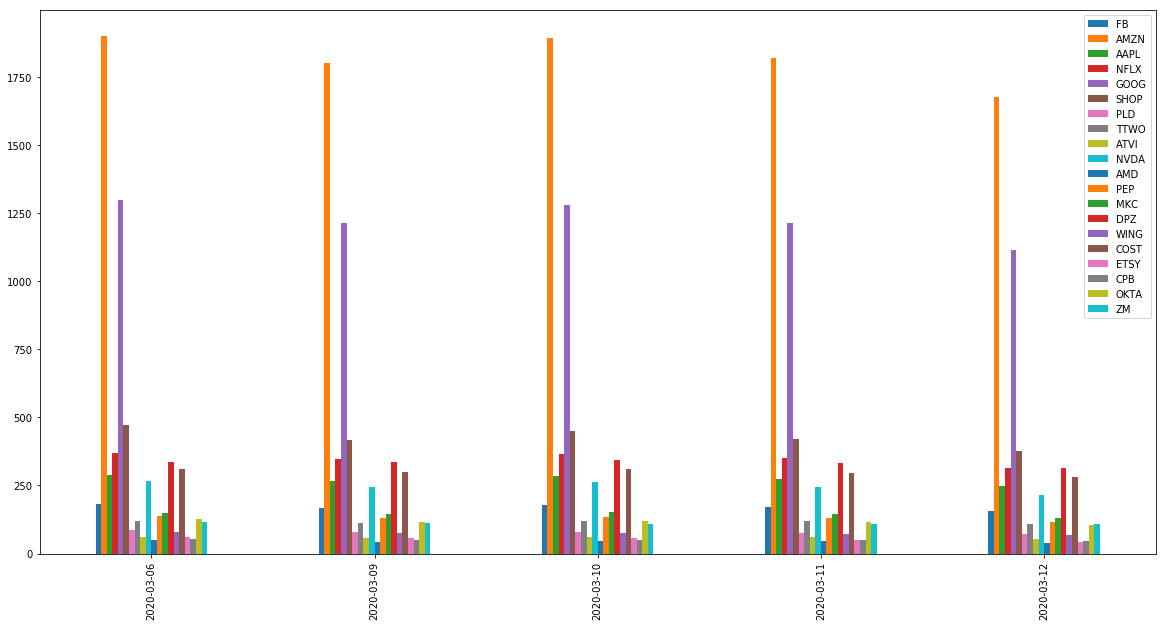

In [7]:
closing_df.plot(kind="bar",figsize=(20,10))

In [8]:
daily_returns=closing_df.pct_change()
daily_returns.dropna()


,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
2020-03-09,-0.069074,-0.053194,-0.079210,-0.061995,-0.064617,-0.115397,-0.094023,-0.032962,-0.046614,-0.079152,-0.109877,-0.051869,-0.044307,-0.000624,-0.057013,-0.033388,-0.034813,-0.030145,-0.088340,-0.005073
2020-03-10,0.056880,0.052216,0.073659,0.052712,0.054755,0.077967,0.039866,0.043222,0.062188,0.065589,0.049006,0.031348,0.052964,0.023167,0.018860,0.028992,-0.009060,0.021120,0.037872,-0.046279
2020-03-11,-0.044728,-0.039266,-0.036368,-0.040300,-0.051452,-0.062065,-0.088301,0.001263,-0.022892,-0.057147,0.006831,-0.034046,-0.032213,-0.033106,-0.060391,-0.040043,-0.133862,-0.015122,-0.037245,0.016354
2020-03-12,-0.092586,-0.078818,-0.099165,-0.105724,-0.083335,-0.105890,-0.048155,-0.088730,-0.080398,-0.122380,-0.146312,-0.110443,-0.105313,-0.051254,-0.046248,-0.059323,-0.122884,-0.055770,-0.075717,-0.007165


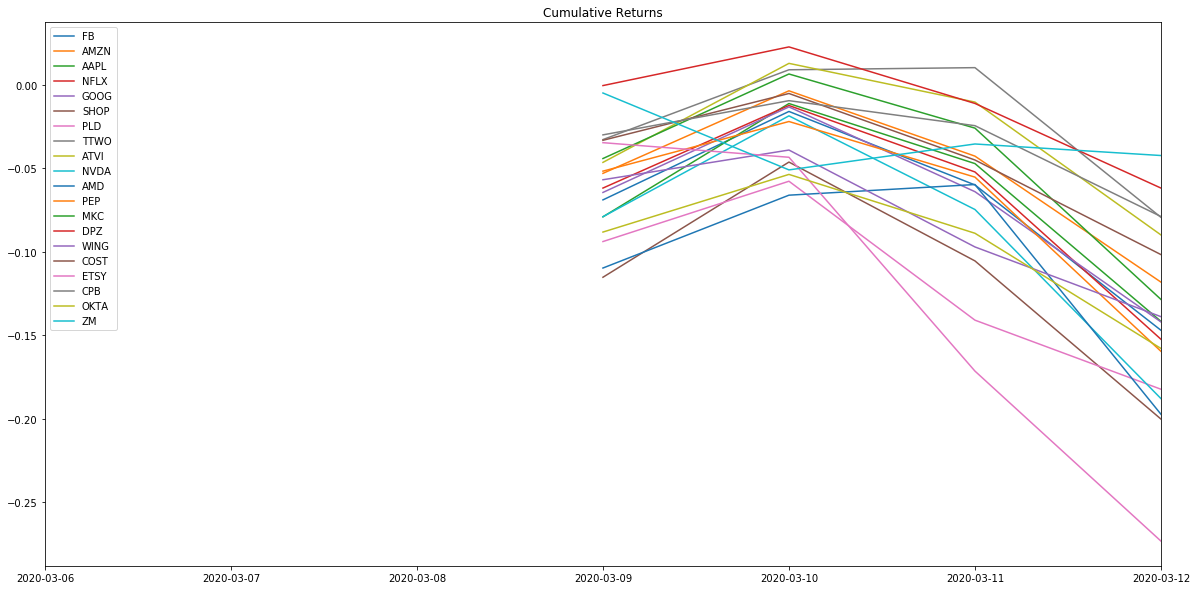

In [66]:
# Calculate cumulative returns of all portfolios

cramer_cumulative = (1 + daily_returns).cumprod()-1

# Plot cumulative returns
cramer_cumulative.plot(figsize=(20, 10), title="Cumulative Returns")

In [68]:
cramer_cumulative
cramer_cumulative.dropna()

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
2020-03-09,-0.069074,-0.053194,-0.079210,-0.061995,-0.064617,-0.115397,-0.094023,-0.032962,-0.046614,-0.079152,-0.109877,-0.051869,-0.044307,-0.000624,-0.057013,-0.033388,-0.034813,-0.030145,-0.088340,-0.005073
2020-03-10,-0.016123,-0.003756,-0.011385,-0.012551,-0.013401,-0.046427,-0.057905,0.008835,0.012675,-0.018754,-0.066255,-0.022146,0.006311,0.022528,-0.039228,-0.005364,-0.043557,-0.009662,-0.053814,-0.051117
2020-03-11,-0.060129,-0.042874,-0.047339,-0.052345,-0.064163,-0.105611,-0.141093,0.010110,-0.010507,-0.074830,-0.059877,-0.055438,-0.026106,-0.011323,-0.097250,-0.045192,-0.171589,-0.024638,-0.089055,-0.035599
2020-03-12,-0.147148,-0.118313,-0.141809,-0.152535,-0.142151,-0.200318,-0.182454,-0.079517,-0.090060,-0.188052,-0.197428,-0.159758,-0.128670,-0.061997,-0.139001,-0.101834,-0.273387,-0.079034,-0.158028,-0.042509


In [10]:
#standard deviation
standard_deviation=cramer_cumulative.std()
standard_deviation

FB      0.054510
AMZN    0.047553
AAPL    0.055349
NFLX    0.059127
GOOG    0.053127
SHOP    0.063389
PLD     0.054378
TTWO    0.042437
ATVI    0.044840
NVDA    0.070800
AMD     0.063400
PEP     0.060183
MKC     0.057591
DPZ     0.035678
WING    0.044461
COST    0.040528
ETSY    0.113754
CPB     0.030050
OKTA    0.043693
ZM      0.020033
dtype: float64

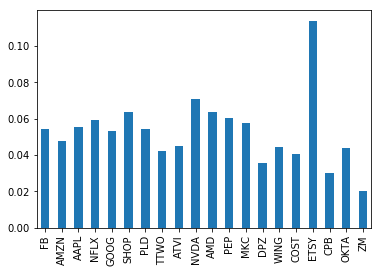

In [11]:
standard_deviation.plot.bar()

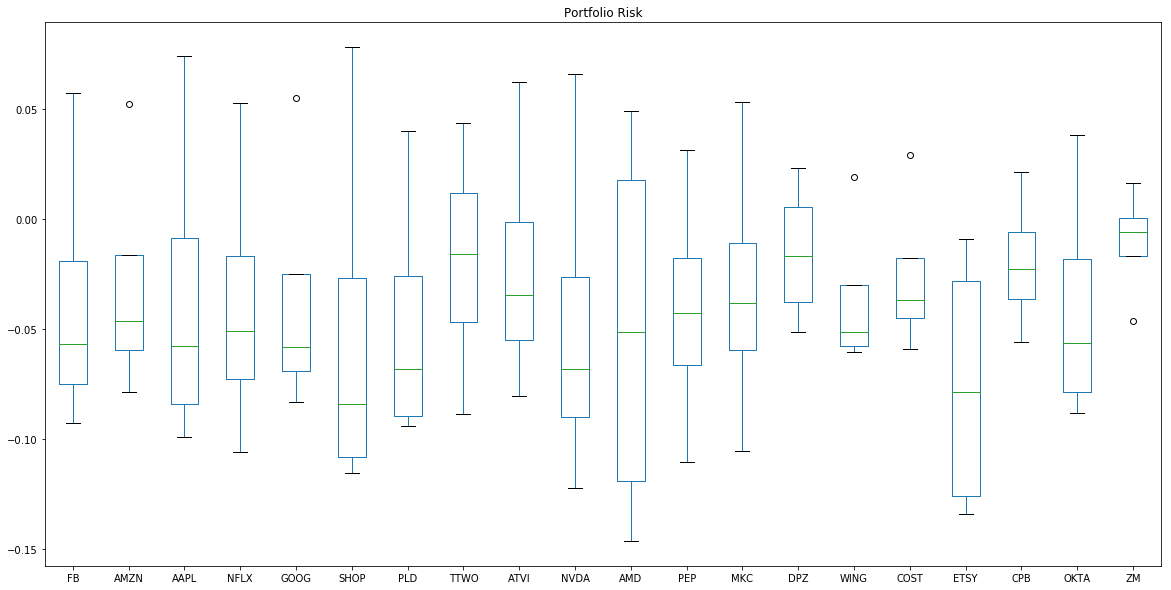

In [12]:
# Box plot to visually show risk
daily_returns.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [80]:
#comparison to S&P500
file_path=Path("snp_data_5Y.csv")

snp_data = pd.read_csv(file_path,index_col="Date",infer_datetime_format=True,parse_dates=True)

snp_data=snp_data.drop(columns=['Volume','Open','High','Low'])
snp_data.columns=['S&P500']
snp_data



,S&P500
Date,
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05
2021-05-21,4155.86
2021-05-20,4159.12
2021-05-19,4115.68
2021-05-18,4127.83


In [106]:
snp_data_1week = snp_data.iloc[[310,309,308,307,306]]
snp_data_1week

,S&P500
Date,
2020-03-06,2972.37
2020-03-09,2746.56
2020-03-10,2882.23
2020-03-11,2741.38
2020-03-12,2480.64


In [107]:
snp_data_1week.pct_change()


,S&P500
Date,
2020-03-06,NaN
2020-03-09,-0.075970
2020-03-10,0.049396
2020-03-11,-0.048868
2020-03-12,-0.095113


In [108]:
(snp_data_1week.pct_change()) *100

,S&P500
Date,
2020-03-06,NaN
2020-03-09,-7.596968
2020-03-10,4.939634
2020-03-11,-4.886841
2020-03-12,-9.511268


In [78]:
snp_data.index=snp_data.index.date

In [38]:
closing_df.head()

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
2020-03-06,181.11,1901.14,288.98,368.90,1298.41,472.0877,85.83,117.71,59.960,266.070,48.600,137.27,150.54,336.47,79.28,311.340,60.61,51.750,125.99,114.3300
2020-03-09,168.60,1800.01,266.09,346.03,1214.51,417.6100,77.76,113.83,57.165,245.010,43.260,130.15,143.87,336.26,74.76,300.945,58.50,50.190,114.86,113.7500
2020-03-10,178.19,1894.00,285.69,364.27,1281.01,450.1700,80.86,118.75,60.720,261.080,45.380,134.23,151.49,344.05,76.17,309.670,57.97,51.250,119.21,108.4858
2020-03-11,170.22,1819.63,275.30,349.59,1215.10,422.2300,73.72,118.90,59.330,246.160,45.690,129.66,146.61,332.66,71.57,297.270,50.21,50.475,114.77,110.2600
2020-03-12,154.46,1676.21,248.00,312.63,1113.84,377.5200,70.17,108.35,54.560,216.035,39.005,115.34,131.17,315.61,68.26,279.635,44.04,47.660,106.08,109.4700


In [39]:
combined_df= pd.concat([closing_df,snp_data],axis="columns",join="inner")

combined_df

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,...,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM,S&P500
2020-03-06,181.11,1901.14,288.98,368.90,1298.41,472.0877,85.83,117.71,59.960,266.070,...,137.27,150.54,336.47,79.28,311.340,60.61,51.750,125.99,114.3300,2972.37
2020-03-09,168.60,1800.01,266.09,346.03,1214.51,417.6100,77.76,113.83,57.165,245.010,...,130.15,143.87,336.26,74.76,300.945,58.50,50.190,114.86,113.7500,2746.56
2020-03-10,178.19,1894.00,285.69,364.27,1281.01,450.1700,80.86,118.75,60.720,261.080,...,134.23,151.49,344.05,76.17,309.670,57.97,51.250,119.21,108.4858,2882.23
2020-03-11,170.22,1819.63,275.30,349.59,1215.10,422.2300,73.72,118.90,59.330,246.160,...,129.66,146.61,332.66,71.57,297.270,50.21,50.475,114.77,110.2600,2741.38
2020-03-12,154.46,1676.21,248.00,312.63,1113.84,377.5200,70.17,108.35,54.560,216.035,...,115.34,131.17,315.61,68.26,279.635,44.04,47.660,106.08,109.4700,2480.64


In [44]:
combined_daily_returns=combined_df.pct_change()

In [45]:

# Calculate covariance of all weekly returns of Cramer Picks vs. S&P500
AAPLcov=combined_daily_returns['AAPL'].cov(combined_daily_returns['S&P500'])

FBcov=combined_daily_returns['FB'].cov(combined_daily_returns['S&P500'])

AMZNcov=combined_daily_returns['AMZN'].cov(combined_daily_returns['S&P500'])

NFLXcov=combined_daily_returns['NFLX'].cov(combined_daily_returns['S&P500'])

GOOGcov=combined_daily_returns['GOOG'].cov(combined_daily_returns['S&P500'])

SHOPcov=combined_daily_returns['SHOP'].cov(combined_daily_returns['S&P500'])

NVDAcov=combined_daily_returns['NVDA'].cov(combined_daily_returns['S&P500'])

AMDcov=combined_daily_returns['AMD'].cov(combined_daily_returns['S&P500'])

PEPcov=combined_daily_returns['PEP'].cov(combined_daily_returns['S&P500'])

MKCcov=combined_daily_returns['MKC'].cov(combined_daily_returns['S&P500'])

DPZcov=combined_daily_returns['DPZ'].cov(combined_daily_returns['S&P500'])

WINGcov=combined_daily_returns['WING'].cov(combined_daily_returns['S&P500'])

ATVIcov=combined_daily_returns['ATVI'].cov(combined_daily_returns['S&P500'])

COSTcov=combined_daily_returns['COST'].cov(combined_daily_returns['S&P500'])

CPBcov=combined_daily_returns['CPB'].cov(combined_daily_returns['S&P500'])

ETSYcov=combined_daily_returns['ETSY'].cov(combined_daily_returns['S&P500'])

OKTAcov=combined_daily_returns['OKTA'].cov(combined_daily_returns['S&P500'])

PLDcov=combined_daily_returns['PLD'].cov(combined_daily_returns['S&P500'])

TTWOcov=combined_daily_returns['TTWO'].cov(combined_daily_returns['S&P500'])

ZMcov=combined_daily_returns['ZM'].cov(combined_daily_returns['S&P500'])




In [46]:
AAPLcov

0.004949834691017363

In [59]:
# Calculate variance of all weekly returns of Cramer Picks vs. S&P500
AAPLvar=combined_daily_returns['AAPL'].var()

FBvar=combined_daily_returns['FB'].var()

AMZNvar=combined_daily_returns['AMZN'].var()

NFLXvar=combined_daily_returns['NFLX'].var()

GOOGvar=combined_daily_returns['GOOG'].var()

SHOPvar=combined_daily_returns['SHOP'].var()

NVDAvar=combined_daily_returns['NVDA'].var()

AMDvar=combined_daily_returns['AMD'].var()

PEPvar=combined_daily_returns['PEP'].var()

MKCvar=combined_daily_returns['MKC'].var()

DPZvar=combined_daily_returns['DPZ'].var()

WINGvar=combined_daily_returns['WING'].var()

ATVIvar=combined_daily_returns['ATVI'].var()

COSTvar=combined_daily_returns['COST'].var()

CPBvar=combined_daily_returns['CPB'].var()

ETSYvar=combined_daily_returns['ETSY'].var()

OKTAvar=combined_daily_returns['OKTA'].var()

PLDvar=combined_daily_returns['PLD'].var()

TTWOvar=combined_daily_returns['TTWO'].var()

ZMvar=combined_daily_returns['ZM'].var()

ZMvar


0.0006806104076110868

In [60]:
# Calculate beta of all daily returns of Cramer Picks
AAPLbeta = AAPLcov / AAPLvar
print(f'Beta of AAPL is {AAPLbeta}')

FBbeta= FBcov / FBvar
print(f' Beta of FB is {FBbeta}')

AMZNbeta= AMZNcov / AMZNvar
print(f' Beta of AMZN is {AMZNbeta}')

NFLXbeta= NFLXcov / NFLXvar
print(f' Beta of NFLX is {NFLXbeta}')

GOOGbeta= GOOGcov / GOOGvar
print(f' Beta of GOOG is {GOOGbeta}')

SHOPbeta= SHOPcov / SHOPvar
print(f' Beta of SHOP is {SHOPbeta}')

NVDAbeta= NVDAcov / NVDAvar
print(f' Beta of NVDA is {NVDAbeta}')

AMDbeta= AMDcov / AMDvar
print(f' Beta of AMD is {AMDbeta}')

PEPbeta= PEPcov / PEPvar
print(f' Beta of PEP is {PEPbeta}')

MKCbeta= MKCcov /MKCvar
print(f' Beta of MKC is {MKCbeta}')

DPZbeta= DPZcov / DPZvar
print(f' Beta of DPZ is {DPZbeta}')

WINGbeta= WINGcov / WINGvar
print(f' Beta of WING is {WINGbeta}')

ATVIbeta= ATVIcov/ ATVIvar
print(f' Beta of ATVI is {ATVIbeta}')

COSTbeta= COSTcov/ COSTvar
print(f' Beta of COST is {COSTbeta}')

CPBbeta= CPBcov/ CPBvar
print(f' Beta of CPB is {CPBbeta}')

ETSYbeta= ETSYcov / ETSYvar
print(f' Beta of ETSY is {ETSYbeta}')

OKTAbeta = OKTAcov / OKTAvar
print(f' Beta of OKTA is {OKTAbeta}')

PLDbeta= PLDcov / PLDvar
print(f' Beta of PLD is {PLDbeta}')

TTWObeta= TTWOcov / TTWOvar
print(f' Beta of TTWO is {TTWObeta}')

ZMbeta= ZMcov / ZMvar
print(f' Beta of ZM is {ZMbeta}')


Beta of AAPL is 0.8305091627586897
 Beta of FB is 0.9756063058218634
 Beta of AMZN is 1.1221454914674296
 Beta of NFLX is 0.9494536274420301
 Beta of GOOG is 1.0305146111415728
 Beta of SHOP is 0.7094094786587356
 Beta of NVDA is 0.7928964036220725
 Beta of AMD is 0.6104932393293342
 Beta of PEP is 1.0389962210171264
 Beta of MKC is 0.9476782539612658
 Beta of DPZ is 1.5277389671726738
 Beta of WING is 1.5512323578039007
 Beta of ATVI is 1.0480874686908834
 Beta of COST is 1.6285914975530342
 Beta of CPB is 1.9273849463550365
 Beta of ETSY is 0.6491676370338973
 Beta of OKTA is 1.0985457504825675
 Beta of PLD is 0.861954061288604
 Beta of TTWO is 1.041301484620324
 Beta of ZM is -1.8689493556029853


In [109]:
#Price Correlation
price_correlation = combined_df.corr()
price_correlation

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,...,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM,S&P500
FB,1.000000,0.997124,0.989172,0.996652,0.998201,0.986736,0.916236,0.883675,0.944179,0.998678,...,0.984028,0.976390,0.897029,0.929137,0.984999,0.875388,0.990631,0.967010,0.325295,0.995253
AMZN,0.997124,1.000000,0.991031,0.996661,0.994925,0.973728,0.890756,0.904142,0.962021,0.996219,...,0.979601,0.986896,0.918398,0.906597,0.983224,0.860915,0.988826,0.945142,0.263705,0.985758
AAPL,0.989172,0.991031,1.000000,0.985161,0.980900,0.973923,0.864593,0.923078,0.974581,0.982430,...,0.958485,0.975547,0.867801,0.871246,0.952337,0.795389,0.977938,0.943637,0.225279,0.973380
NFLX,0.996652,0.996661,0.985161,1.000000,0.993130,0.971874,0.892018,0.905922,0.950931,0.998392,...,0.992189,0.988603,0.919263,0.914111,0.986547,0.878105,0.997542,0.951529,0.326657,0.989573
GOOG,0.998201,0.994925,0.980900,0.993130,1.000000,0.986479,0.931726,0.859602,0.930698,0.997845,...,0.981661,0.969377,0.903794,0.943930,0.990913,0.895181,0.984699,0.966881,0.331720,0.995905
SHOP,0.986736,0.973728,0.973923,0.971874,0.986479,1.000000,0.952118,0.820174,0.899330,0.980556,...,0.957711,0.929604,0.821590,0.949413,0.961626,0.862348,0.964113,0.991471,0.383684,0.991814
PLD,0.916236,0.890756,0.864593,0.892018,0.931726,0.952118,1.000000,0.624142,0.741552,0.915514,...,0.896876,0.818194,0.758729,0.992916,0.926966,0.925313,0.880431,0.964801,0.528465,0.945649
TTWO,0.883675,0.904142,0.923078,0.905922,0.859602,0.820174,0.624142,1.000000,0.972154,0.881751,...,0.879707,0.948626,0.847941,0.658007,0.837183,0.626800,0.911677,0.773844,0.063753,0.843244
ATVI,0.944179,0.962021,0.974581,0.950931,0.930698,0.899330,0.741552,0.972154,1.000000,0.938109,...,0.912948,0.974767,0.885167,0.757847,0.903339,0.702948,0.942560,0.846635,0.046615,0.908336
NVDA,0.998678,0.996219,0.982430,0.998392,0.997845,0.980556,0.915514,0.881751,0.938109,1.000000,...,0.990940,0.979825,0.912885,0.933866,0.991379,0.893644,0.993941,0.962599,0.345510,0.995307


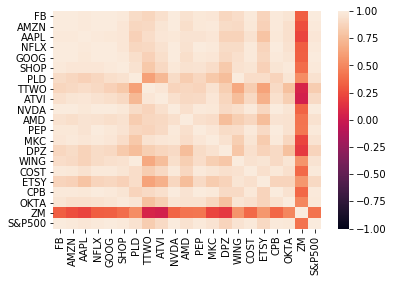

In [64]:
#heatmap
sns.heatmap(price_correlation, vmin=-1, vmax=1)
